<img src="../Images/DSC_Logo.png" style="width: 400px;">

# Time Series Concepts in Python 

Basic Python packages for data handling:

In [1]:
import numpy as np
import pandas as pd

Python packages for specific analysis:

In [2]:
import math
import statistics as stat
import random

Matplotlib - the basic library for plotting:

In [3]:
import matplotlib.pyplot as plt

Python packages specifically for time series data analysis:

In [4]:
from datetime import datetime

## 1. Create time series in Python

In [5]:
my_year = 2020
my_month = 1
my_day = 23
#my_hour = 13
#my_min = 30
#my_sec = 15
my_date = datetime(my_year,my_month,my_day)

In [6]:
my_date

datetime.datetime(2020, 1, 23, 0, 0)

In [7]:
my_date.day

23

Operations in datetime format:

In [8]:
nowday = datetime.today()
diff = nowday - my_date
diff.days

1740

## 1.2. Create DateTime object using NumPy

In [9]:
np.array(['2020-03-09','2020-03-10','2020-03-11','2020-03-12','2020-03-13','2020-03-14'], dtype='datetime64')
# or:
np.arange('2020-03-09','2020-03-15', dtype='datetime64[D]')

array(['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14'], dtype='datetime64[D]')

## 1.3. Create DateTime object using Pandas

In [10]:
pd.date_range('2020-03-09', periods=6, freq='D')

DatetimeIndex(['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14'],
              dtype='datetime64[ns]', freq='D')

Specify format:

In [11]:
pd.to_datetime('2020-09-03', format='%Y-%d-%m')

Timestamp('2020-03-09 00:00:00')

**Exercise:** Test how the following format could be converted in a DateTime object: 15/10/2020

In [20]:
pd.to_datetime('15-10-2020', format='%d-%m-%Y')

Timestamp('2020-10-15 00:00:00')

## 1.4. Create a Pandas time series dataframe

In [27]:
data = np.random.randn(6,2) # create some random data
data

array([[-0.36173184, -0.16599684],
       [-0.5553076 , -0.32809009],
       [-0.38539864, -0.58151257],
       [ 1.0173773 , -0.52657396],
       [ 2.14303872,  0.11560505],
       [ 0.92642261, -1.93563822]])

In [28]:
cols = ['A','B']
idx = pd.date_range('2020-03-09', periods=6, freq='D')
df = pd.DataFrame(data, index=idx, columns=cols)
df

,A,B
2020-03-09,-0.361732,-0.165997
2020-03-10,-0.555308,-0.328090
2020-03-11,-0.385399,-0.581513
2020-03-12,1.017377,-0.526574
2020-03-13,2.143039,0.115605
2020-03-14,0.926423,-1.935638


<Axes: >

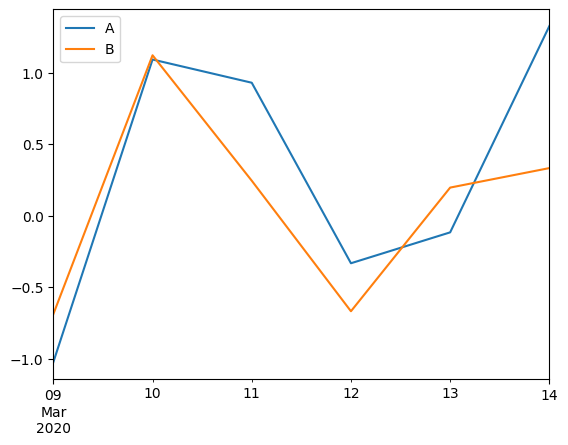

In [23]:
df.plot()

**Exercise:** Create a Pandas time series dataframe that contains decadal data.

In [26]:
idx2 = pd.date_range('2020-03-09', periods=6, freq='Y')
df2 = pd.DataFrame(data, index=idx2, columns=cols)
df

/tmp/ipykernel_908/2541886718.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  idx = pd.date_range('2020-03-09', periods=6, freq='Y')


,A,B
2020-12-31,-1.024423,-0.689207
2021-12-31,1.091272,1.120922
2022-12-31,0.928927,0.243903
2023-12-31,-0.333343,-0.669018
2024-12-31,-0.117384,0.195684
2025-12-31,1.325097,0.332028


## 1.5 Interchange date column and index in dataframes

In [29]:
data = np.random.randn(100,2) # create some random data
cols = ['A','B']
idx = pd.date_range('2020-03-09', periods=100, freq='D')
df = pd.DataFrame(data, index=idx, columns=cols)

df['Date'] = df.index
df

,A,B,Date
2020-03-09,-1.794363,-2.789375,2020-03-09
2020-03-10,1.865133,-1.516177,2020-03-10
2020-03-11,0.374736,1.363707,2020-03-11
2020-03-12,-0.049081,0.927813,2020-03-12
2020-03-13,-0.129313,0.339340,2020-03-13
...,...,...,...
2020-06-12,-0.029540,-0.989718,2020-06-12
2020-06-13,-0.142069,1.623677,2020-06-13
2020-06-14,-0.756165,0.777052,2020-06-14
2020-06-15,0.216954,-0.960172,2020-06-15


## 1.6 Derive DateTime elements

In [ ]:
df['Month'] = df['Date'].dt.month
df

In [ ]:
df['Month'] = df.index.month
df

**Exercise:** How could we define a new column with the years?

## 2. Basic time series operations

## 2.1. Resampling - changing the frequency of time series data

In [30]:
df.resample('W-MON').mean()

,A,B,Date
2020-03-09,-1.794363,-2.789375,2020-03-09
2020-03-16,0.445253,-0.031527,2020-03-13
2020-03-23,0.322763,-0.261900,2020-03-20
2020-03-30,0.719205,0.609713,2020-03-27
2020-04-06,-0.011461,0.386689,2020-04-03
2020-04-13,-0.175570,0.328338,2020-04-10
2020-04-20,-0.050710,-0.479232,2020-04-17
2020-04-27,0.062062,0.088826,2020-04-24
2020-05-04,-0.625121,-0.026689,2020-05-01
2020-05-11,0.154068,0.728604,2020-05-08


## 2.2 Shifting the data points in a time series forward (or backward) in time

In [31]:
df.shift(1)

,A,B,Date
2020-03-09,NaN,NaN,NaT
2020-03-10,-1.794363,-2.789375,2020-03-09
2020-03-11,1.865133,-1.516177,2020-03-10
2020-03-12,0.374736,1.363707,2020-03-11
2020-03-13,-0.049081,0.927813,2020-03-12
...,...,...,...
2020-06-12,-0.411622,1.511656,2020-06-11
2020-06-13,-0.029540,-0.989718,2020-06-12
2020-06-14,-0.142069,1.623677,2020-06-13
2020-06-15,-0.756165,0.777052,2020-06-14


## 2.3 Time-based slicing

In [32]:
df['2020-03-10':'2020-03-12']

,A,B,Date
2020-03-10,1.865133,-1.516177,2020-03-10
2020-03-11,0.374736,1.363707,2020-03-11
2020-03-12,-0.049081,0.927813,2020-03-12


## 3. Import & analyze - temperature time series
![sky](../Images/temperature.jpg)

*Image modified from Gerd Altmann, Pixabay*

## 3.1. Pandas for csv files

Import data from csv:

In [33]:
path = '../Datasets/NOAA_time_series.csv' 
df = pd.read_csv(path, skiprows=4, delimiter=',')

In [34]:
df.head()

,Year,Anomaly
0,1850,-0.03
1,1851,0.07
2,1852,0.08
3,1853,0.13
4,1854,0.00


Summary statistics:

In [35]:
df.describe()

,Year,Anomaly
count,175.000000,175.000000
mean,1937.000000,0.073200
std,50.662281,0.339958
min,1850.000000,-0.430000
25%,1893.500000,-0.155000
50%,1937.000000,-0.020000
75%,1980.500000,0.195000
max,2024.000000,1.210000


Setting the time variable as index:

In [36]:
df.set_index('Year', inplace=True) # Set the 'Date' column as the index

In [37]:
df.head()

,Anomaly
Year,
1850,-0.03
1851,0.07
1852,0.08
1853,0.13
1854,0.00


Plot:

<Axes: xlabel='Year'>

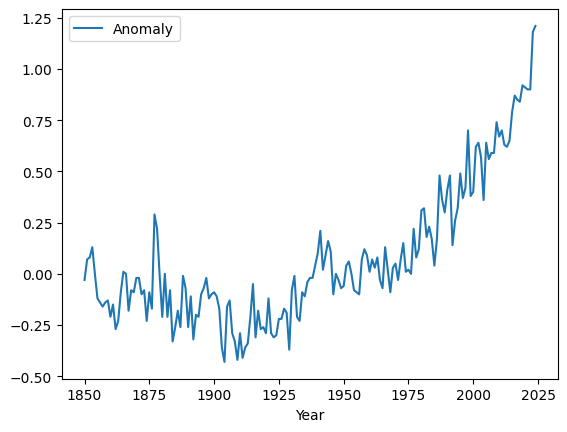

In [38]:
df.plot()

### More plots ...

### Boxplot:

In [ ]:
# Create a new column for decade
df['Decade'] = (df.index // 10) * 10

# Prepare data for boxplot
decade_data = [df[df['Decade'] == decade]['Anomaly'].values for decade in df['Decade'].unique()]

# Create boxplot using matplotlib
plt.figure()
plt.boxplot(decade_data, labels=df['Decade'].unique())
plt.title('Decade Boxplot of Anomalies')
plt.xlabel('Decade')
plt.ylabel('Anomaly')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### Bar plot:

In [ ]:
# Calculate the average anomaly per decade
average_anomalies = df.groupby('Decade')['Anomaly'].median()

# Create a bar plot using matplotlib
plt.figure()
average_anomalies.plot(kind='bar', color='skyblue')
plt.title('Average Anomalies by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Anomaly')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 3.2. xarray for netCDF

Like pandas for netCDF ... common data format for time series data ...

In [39]:
pip install xarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
import xarray as xr

Import a dataset from [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels) reanalysis: 

In [46]:
pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 24.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
import py7zr

archive = py7zr.SevenZipFile('../Datasets/ERA5_snippet.7z', mode='r')
archive.extractall(path="../Datasets")
archive.close()

In [57]:
ERA5 = xr.open_dataset('../Datasets/ERA5_snippet.nc')

Investigate:

In [58]:
ERA5

<xarray.Dataset> Size: 171MB
Dimensions:    (longitude: 37, latitude: 33, time: 8760)
Coordinates:
  * longitude  (longitude) float32 148B 6.0 6.25 6.5 6.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 132B 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
  * time       (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float64 86MB ...
    tp         (time, latitude, longitude) float64 86MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-08-27 15:32:48 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [59]:
ERA5['tp']

<xarray.DataArray 'tp' (time: 8760, latitude: 33, longitude: 37)> Size: 86MB
[10695960 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 148B 6.0 6.25 6.5 6.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 132B 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
  * time       (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

In [60]:
ERA5['t2m']

<xarray.DataArray 't2m' (time: 8760, latitude: 33, longitude: 37)> Size: 86MB
[10695960 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 148B 6.0 6.25 6.5 6.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 132B 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
  * time       (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

Mathematical operations:

In [61]:
ERA5['t2m'].values = (ERA5.t2m-273.15).values

In [62]:
ERA5

<xarray.Dataset> Size: 171MB
Dimensions:    (longitude: 37, latitude: 33, time: 8760)
Coordinates:
  * longitude  (longitude) float32 148B 6.0 6.25 6.5 6.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 132B 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
  * time       (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float64 86MB 10.54 10.66 ... 3.396
    tp         (time, latitude, longitude) float64 86MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-08-27 15:32:48 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

Resample:

In [63]:
ERA5 = ERA5.resample(time='1D').mean()  # Daily mean

In [64]:
ERA5

<xarray.Dataset> Size: 7MB
Dimensions:    (time: 365, latitude: 33, longitude: 37)
Coordinates:
  * longitude  (longitude) float32 148B 6.0 6.25 6.5 6.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 132B 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
  * time       (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
Data variables:
    t2m        (time, latitude, longitude) float64 4MB 10.08 10.14 ... 0.6181
    tp         (time, latitude, longitude) float64 4MB 0.0001296 ... 7.401e-05
Attributes:
    Conventions:  CF-1.6
    history:      2024-08-27 15:32:48 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

Select a specific date:

In [65]:
ERA5['t2m'][0,:,:] # select by index: first entry

<xarray.DataArray 't2m' (latitude: 33, longitude: 37)> Size: 10kB
array([[10.08039796, 10.14260458, 10.20052377, ...,  9.36357974,
         9.41771821,  9.46386648],
       [10.19740565, 10.16295035, 10.14151324, ...,  9.77388617,
         9.76320658,  9.78589095],
       [10.1424097 , 10.10760361,  9.95840128, ...,  9.28738054,
         9.29747547,  9.58028951],
       ...,
       [15.53057061, 15.40424753, 15.03256689, ...,  2.52576302,
         3.06640711,  3.52145864],
       [15.81034448, 15.61168087, 14.3003919 , ...,  1.64419081,
         2.35668263,  2.81820427],
       [14.81620792, 13.61888646, 12.29286435, ...,  2.52630869,
         2.93836906,  3.44650669]])
Coordinates:
  * longitude  (longitude) float32 148B 6.0 6.25 6.5 6.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 132B 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
    time       datetime64[ns] 8B 2023-01-01
Attributes:
    units:      K
    long_name:  2 metre temperature

In [66]:
ERA5['t2m'].sel(time='2023-07-01') # select by date

<xarray.DataArray 't2m' (latitude: 33, longitude: 37)> Size: 10kB
array([[16.76308791, 16.79161877, 16.80631294, ..., 17.22480444,
        17.1910897 , 17.13157247],
       [16.88843658, 16.89085313, 16.88777398, ..., 17.42077866,
        17.35950749, 17.29429967],
       [16.95286486, 16.95578811, 16.9433156 , ..., 17.68519576,
        17.62345686, 17.54772537],
       ...,
       [17.61347886, 17.45722176, 17.36184608, ..., 12.80041733,
        13.35513197, 14.39986013],
       [17.26740584, 17.03190936, 16.51242955, ..., 12.88858235,
        13.63740034, 14.73162874],
       [15.97700832, 15.51837094, 14.98977061, ..., 14.90238513,
        15.30665018, 16.03878619]])
Coordinates:
  * longitude  (longitude) float32 148B 6.0 6.25 6.5 6.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 132B 55.0 54.75 54.5 54.25 ... 47.5 47.25 47.0
    time       datetime64[ns] 8B 2023-07-01
Attributes:
    units:      K
    long_name:  2 metre temperature

Plot with matplotlib:

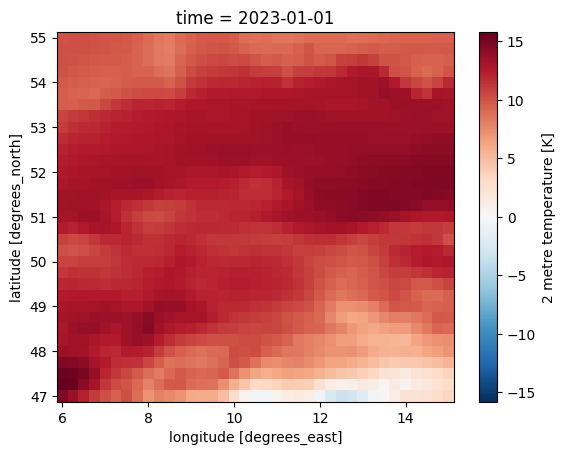

In [67]:
ERA5['t2m'][0,:,:].plot()

Plotting on a map using Cartopy & Matplotlib:

In [68]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 69.2 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 96.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 63.6 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Use the plot method for quick visualization
ERA5['t2m'][0,:,:].plot(ax=ax, cmap='coolwarm', add_colorbar=True)

# Add coastlines and grid lines
ax.coastlines()
ax.gridlines(draw_labels=True)

plt.title('2-Meter Temperature [°C] on 2023-01-01 00:00:00 over Germany')
plt.show()

### Temperature time series for Bremen (single grid cell):

Select data:

In [ ]:
# Select a specific location (e.g., longitude = 10.0, latitude = 50.0)
bremen = ERA5.sel(longitude=8.808, latitude=53.075, method='nearest')

In [ ]:
bremen

Plot:

In [ ]:
plt.figure(figsize=(10, 5))
bremen['t2m'].plot()
plt.title('Daily mean temperature for Bremen in the year 2023')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid()
plt.show()

**Exercise:** Select and plot the temperature time series for another region of your choice in Germany.